In [528]:
import numpy as np
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
import glob
import os

In [530]:
# This returns the current path of the folder we are in
curpath = os.path.abspath('.')                  
# If you have extracted correctly, there should be a sub-folder named Bias, and you should get 3 files in the next cell
biasFolder = os.path.join(curpath, 'bias')

In [531]:
biasList = glob.glob(os.path.join(biasFolder,'*fits'))

numBiasFiles = len(biasList)
print('Found %d bias files' %numBiasFiles)

Found 3 bias files


In [532]:
biasImages = np.zeros((4108, 4096, numBiasFiles))

for i in range(numBiasFiles):
        biasImages[:,:,i] = fits.open(biasList[i])[0].data

In [534]:
# This is to get a good scale on the plot, nothing more
#mean, median, std = sigma_clipped_stats(biasImages[:,:,0])

#plt.figure(figsize=(8,8))
#plt.imshow(biasImages[:,:,0], vmin = median - 3*std, vmax = median + 3*std)
#plt.colorbar()
###np.shape(biasImages)
###biasImages[:,5]

In [537]:
#masterBias = np.median(biasImages, axis=2)

#mean, median, std = sigma_clipped_stats(masterBias)

#plt.figure(figsize=(8,8))
#plt.imshow(masterBias, vmin = median - 3*std, vmax = median + 3*std)
#plt.colorbar()
###np.shape(masterBias)
###masterBias

In [538]:
Flat = fits.open('Flat.fits')[1].data

masterFlat = Flat - masterBias
master_flat_median = np.median(masterFlat)

# This re-scaling is so that we get a reasonable range in the final processed image. 
masterFlat = masterFlat/np.median(masterFlat)
###masterFlat,np.median(masterFlat)

In [540]:
#mean, median, std = sigma_clipped_stats(masterFlat)
#plt.figure(figsize=(8,8))
#plt.imshow(masterFlat, vmin = median - 3*std, vmax = median + 3*std)
#plt.colorbar()

In [542]:
#rawHDU = fits.open('Messier3_raw.fits')[0]
#rawData = rawHDU.data

# Let us have a look at the image:
#plt.figure(figsize = (8,8))
#mean, median, std = sigma_clipped_stats(rawData)
#plt.imshow(rawData, vmin = median - 3*std, vmax = median + 3*std)
#plt.colorbar()

In [544]:
#rawHeader = rawHDU.header

#procData = (rawData - masterBias) / masterFlat

#procHDU = fits.PrimaryHDU(procData)
#procHDU.header = rawHeader

#procHDU.writeto('Messier3.proc.fits', overwrite=True)

In [546]:
#M3_HDU = fits.open('Messier3.proc.fits')[0]
#M3_data = M3_HDU.data

#plt.figure(figsize = (8,8))
#mean, median, std = sigma_clipped_stats(M3_data)
#plt.imshow(M3_data, vmin = median - 3*std, vmax = median + 3*std)
#plt.colorbar()

In [547]:
def get_background_histogram(array, min_count, max_count):
    """
        array is the numpy array that contains the counts for each pixel
        the bins for the histogram will be np.arange(min_count, max_count, 1)
    """
    flattened_array = array.flatten()
    num_pixels, bin_edges = np.histogram(flattened_array, bins=np.arange(min_count, max_count, 1))
    bins = 0.5*(bin_edges[1:] + bin_edges[:-1])
    return bins, num_pixels

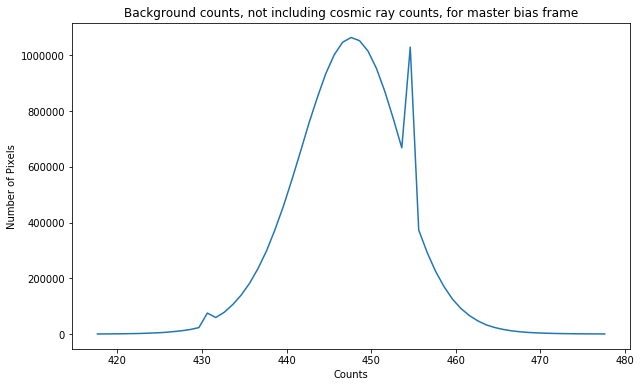

In [548]:
mean,median,std= sigma_clipped_stats(masterBias)
bins, num_pixels = get_background_histogram(masterBias,median-5*std,median+5*std) #entire data, not including cosmic ray counts

plt.figure(figsize = (10,6))
plt.title("Background counts, not including cosmic ray counts, for master bias frame")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.plot(bins, num_pixels)


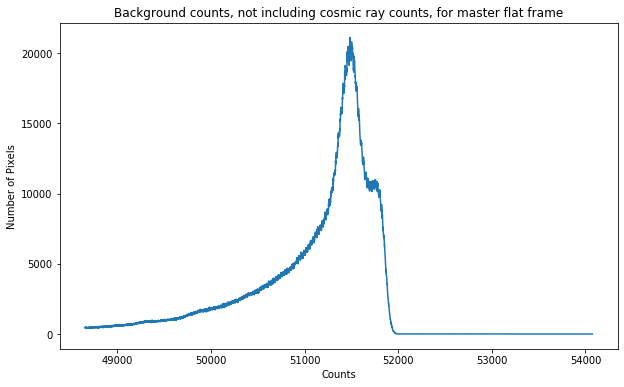

In [549]:
my_masterFlat = masterFlat*master_flat_median
mean,median,std= sigma_clipped_stats(my_masterFlat)
bins, num_pixels = get_background_histogram(my_masterFlat,median-5*std,median+5*std) #entire data, not including cosmic ray counts

plt.figure(figsize = (10,6))
plt.title("Background counts, not including cosmic ray counts, for master flat frame")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.plot(bins, num_pixels)


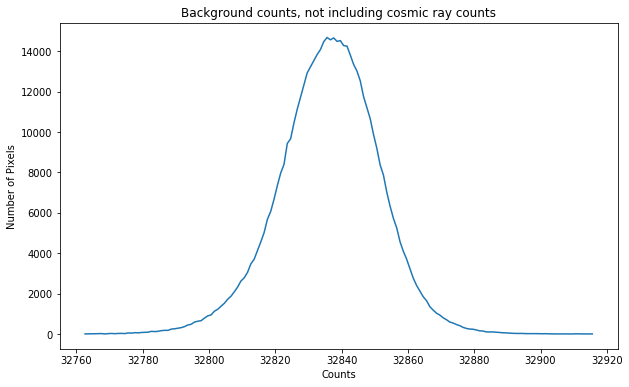

In [552]:
mean, median, std = sigma_clipped_stats(M3_data)
vmin = median - 5*std
vmax = median + 5*std
bins, num_pixels = get_background_histogram(M3_data[250:1000, 3000:3700],vmin,vmax) #background counts, not including cosmic ray counts
plt.figure(figsize = (10,6))
plt.title("Background counts, not including cosmic ray counts")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.plot(bins, num_pixels)
plt.show()


In [557]:
M3_trans=fits.open('Messier3_transient.proc.fits')
M3_trans_data=M3_trans[0].data

In [564]:
mean, median, std = sigma_clipped_stats(M3_trans_data)
#plt.imshow(M3_trans_data, vmin=median-5*std,vmax=median+5*std)

In [566]:
M3_sub_data=M3_trans_data-M3_data
mean, median, std = sigma_clipped_stats(M3_sub_data)

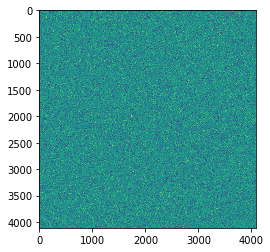

In [568]:
#plt.figure(figsize=[10,10])
plt.imshow(M3_sub_data, vmin= median-5*std, vmax=median+5*std)

In [569]:
print('END OF ASSIGNMENT 08')
print('*'*120)
print('*'*120)
print('*'*120)
print('*'*120)

END OF ASSIGNMENT 08
************************************************************************************************************************
************************************************************************************************************************
************************************************************************************************************************
************************************************************************************************************************


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
def f(t):
    """Python function to calculate a enclosed sinusoid"""
    val = 1 / ((t-2.5)**2 + 1) * np.cos(4*np.pi*t)
    return val

t = np.arange(0.0, 5.0, 0.02)

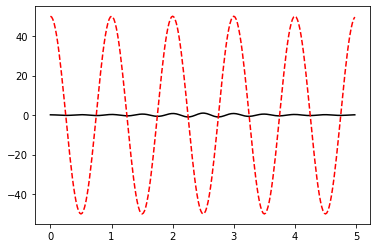

In [4]:
# From what we know till now
plt.plot(t, f(t), 'k')
plt.plot(t, 50*np.cos(2*np.pi*t), 'r--')

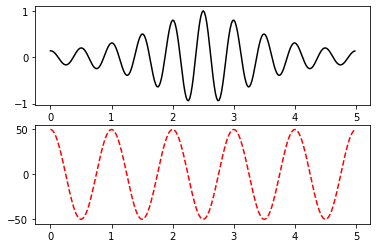

In [5]:
plt.subplot(2, 1, 1) # (2, 1, 1) implies first axes in a grid of 2x1 (2 rows, 1 col)
plt.plot(t, f(t), 'k') # plotting in first axes because it is the current axes

plt.subplot(2, 1, 2) # (2, 1, 2) implies second axes in a grid of 2x1 (2 rows, 1 col)
plt.plot(t, 50*np.cos(2*np.pi*t), 'r--') # plotting in second axes because it is the current axes

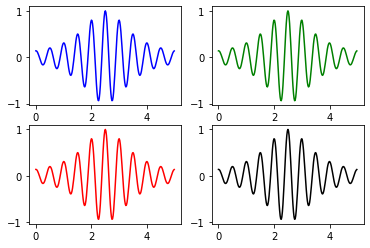

In [24]:
plt.subplot(2, 2, 1) # 1st element of 2x2 grid - 1st row, 1st col
plt.plot(t, f(t), 'b') # Blue graph 

plt.subplot(2, 2, 2) # 2nd element of 2x2 grid - 1st row, 2st col
plt.plot(t, f(t), 'g') # Green graph

plt.subplot(2, 2, 3) # 3rd element of 2x2 grid - 2st row, 1st col
plt.plot(t, f(t), 'r') # Red graph

plt.subplot(2, 2, 4) # 4th element of 2x2 grid - 2st row, 2st col
plt.plot(t, f(t), 'k') # Black graph

(5, 0)

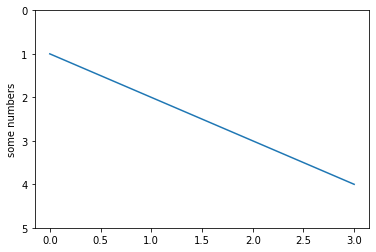

In [13]:
plt.subplot(1, 1, 1)
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.ylim(5, 0) # To invert y-axis

(5, 0)

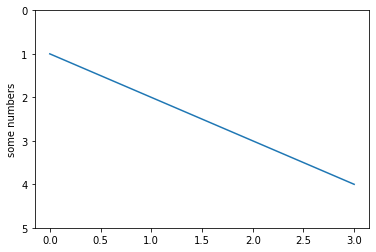

In [14]:
fig = plt.figure()  # create a figure object
ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
ax.plot([1, 2, 3, 4])
ax.set_ylabel('some numbers')
ax.set_ylim(5, 0) # To invert y-axis

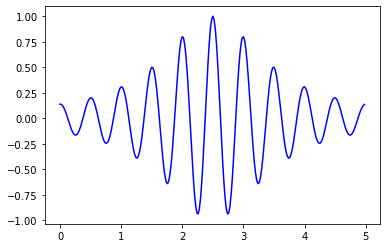

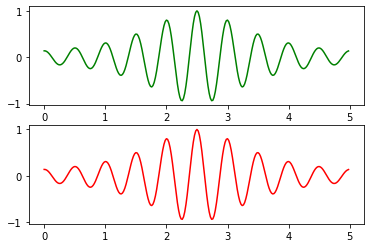

In [20]:
fig1 = plt.figure()
fig2 = plt.figure() # Defined all the figures simultaneously

ax1 = fig1.add_subplot(1, 1, 1)
ax2 = fig2.add_subplot(2, 1, 1)
ax3 = fig2.add_subplot(2, 1, 2)

ax1.plot(t, f(t), 'b') # Blue Graph
ax2.plot(t, f(t), 'g') # Green Graph
ax3.plot(t, f(t), 'r') # Red Graph

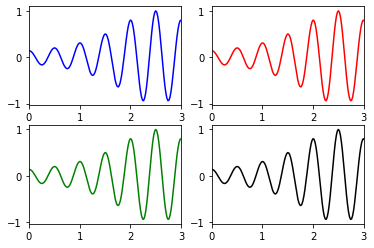

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2) # axes is the multidimensional numpy array of Axes.

axes[0,0].plot(t, f(t), 'b') # Blue graph
axes[1,0].plot(t, f(t), 'g') # Green graph
axes[0,1].plot(t, f(t), 'r') # Red graph
axes[1,1].plot(t, f(t), 'k') # Black graph

# To iterate over all items (along rows) in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    ax.set(xlim=[0, 3])

In [29]:
#fig1, axes1 = plt.subplots(2, 2)

# Share a X axis with each column of subplots
#fig2, axes2 = plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
#fig3, axes3 = plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
#fig4, axes4 = plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
#fig5, axes5 = plt.subplots(2, 2, sharex=True, sharey=True)

# Setting title of figure is using suptitle()
#fig1.suptitle('1st')
#fig2.suptitle('2nd')
#fig3.suptitle('3rd')
#fig4.suptitle('4th')
#fig5.suptitle('5th')

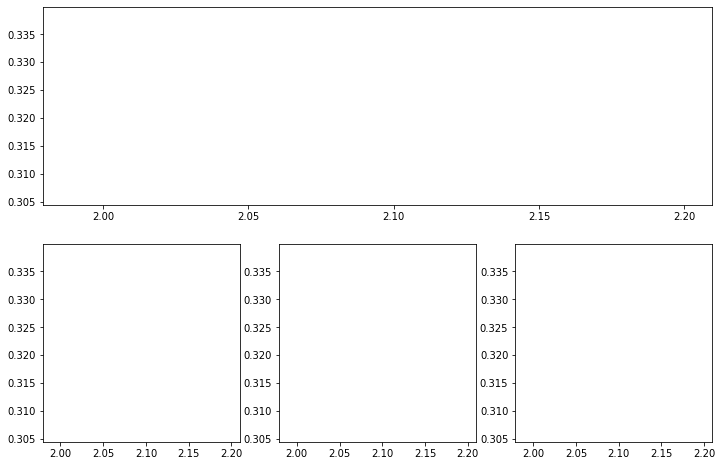

In [149]:
fig = plt.figure(figsize=(12,8)) # Try plt.figure? to know more about the parameters of creating a new figure.

ax1 = fig.add_subplot(2, 1, 1) # Equivalent to 1st element of 2x1 matrix
ax2 = fig.add_subplot(2, 3, 4) # Equivalent to 4th element of 2x3 matrix
ax3 = fig.add_subplot(2, 3, 5) # Equivalent to 5th element of 2x3 matrix
ax4 = fig.add_subplot(2, 3, 6) # Equivalent to 6th element of 2x3 matrix

ax1.plot(t, f(t), 'k') # Black graph 
ax2.plot(t, f(t), 'b') # Blue graph 
ax3.plot(t, f(t), 'g') # Green graph 
ax4.plot(t, f(t), 'r') # Red graph

Text(0.5, 0, 'Time (s)')

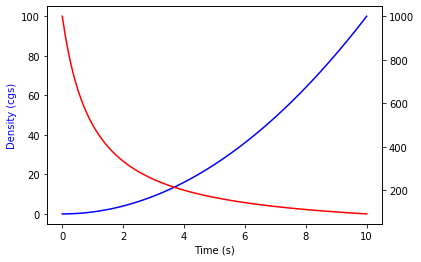

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
# fig.add_subplot(111) gives same result as long as all the three are single digit integer

ax2 = ax1.twinx()

ts = np.linspace(0, 10, 100)
ax1.plot(ts, ts ** 2, 'b-')
ax2.plot(ts, 1000 / (ts + 1), 'r-')

# set_ylabel sets the properties of y-axis label, set_xlabel sets the properties of x-axis label
ax1.set_ylabel('Density (cgs)', color='blue')
ax2.set_xlabel('Temperature (K)', color='red')
ax1.set_xlabel('Time (s)')

Text(0.5, 1.0, 'gs[1, -2]')

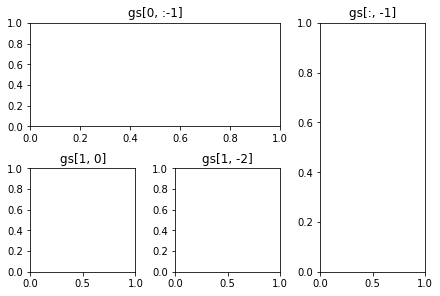

In [53]:
fig = plt.figure(constrained_layout=True)
# Remove the constrained_layout part and see the difference.
gs = fig.add_gridspec(2, 3) # Creates 6 elements in form of 2x3 grid
# If the above line is showing an error then you must have Matplotlib version 2.2.
# Either update Matplotlib version to 3.x or uncomment the following code.
# import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(2, 3)

# Merges 1st element(0,0), 2nd element(0,1)
ax2 = fig.add_subplot(gs[0, :-1])
# [0, :-1] implies 1st row and all columns before last (Recall slicing of list)
ax2.set_title('gs[0, :-1]')

# Merges 3rd element(0,2), 6th element(1,2)
ax3 = fig.add_subplot(gs[:, -1])
ax3.set_title('gs[:, -1]')

# Only 4th element(1,0)
ax4 = fig.add_subplot(gs[1, 0])
ax4.set_title('gs[1, 0]')

# Only 5th element(1,1)
ax5 = fig.add_subplot(gs[1, -2])
ax5.set_title('gs[1, -2]')

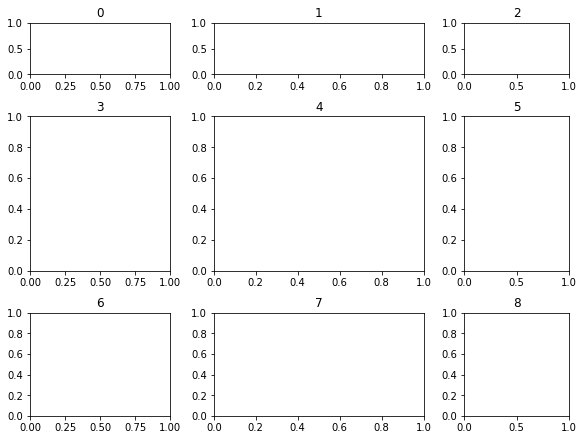

In [56]:
fig = plt.figure(figsize=(8,6), constrained_layout=True)
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig.add_subplot(spec[row, col])
        ax.set(title=str(row*3 + col))

In [58]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S = np.cos(X), np.sin(X)

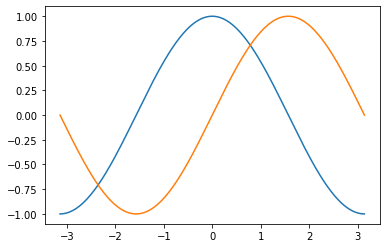

In [59]:
plt.plot(X, C)
plt.plot(X, S)

(-1.1, 1.0999165211263138)

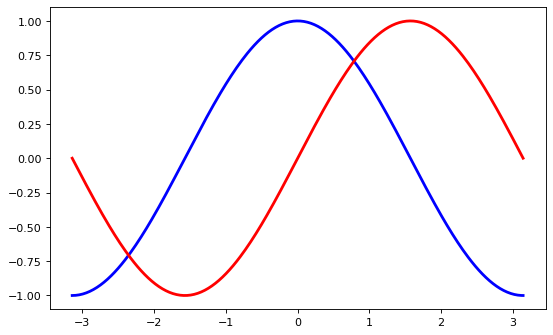

In [61]:
fig = plt.figure(figsize=(8,5), dpi=80) # Create a new figure of size 8x5 points, using 80 dots per inch
ax = fig.add_subplot(111) # Create a new subplot from a grid of 1x1

# Plot cosine using blue color with a continuous line of width 2.5 (pixels)
ax.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
# Plot sine using red color with a continuous line of width 2.5 (pixels)
ax.plot(X, S, color="red", linewidth=2.5, linestyle="-")

ax.set_xlim(X.min()*1.1, X.max()*1.1) # Set x limits
ax.set_ylim(C.min()*1.1, C.max()*1.1) # Set y limits

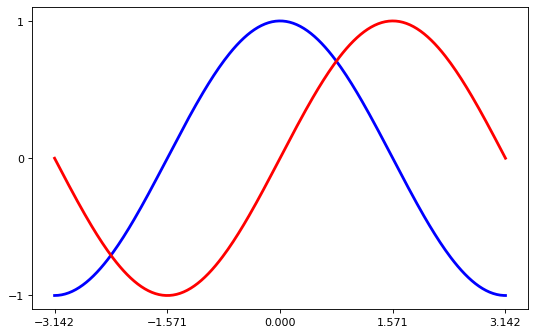

In [62]:
fig = plt.figure(figsize=(8,5), dpi=80)
ax = fig.add_subplot(111)

ax.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
ax.plot(X, S, color="red", linewidth=2.5, linestyle="-")

ax.set_xlim(X.min()*1.1, X.max()*1.1)
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi]) ## This line is new or has been updated.

ax.set_ylim(C.min()*1.1, C.max()*1.1)
ax.set_yticks([-1, 0, +1]) ##

[Text(0, 0, '$-1$'), Text(0, 0, '$0$'), Text(0, 0, '$+1$')]

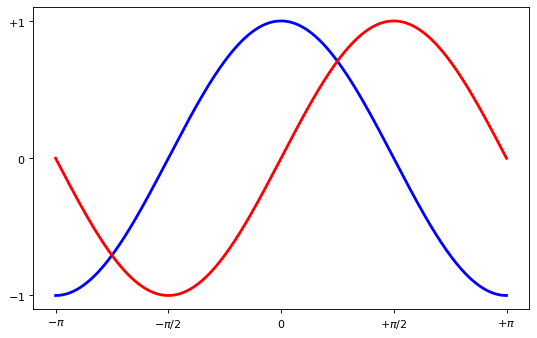

In [63]:
fig = plt.figure(figsize=(8,5), dpi=80)
ax = fig.add_subplot(111)

ax.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
ax.plot(X, S, color="red", linewidth=2.5, linestyle="-")

ax.set_xlim(X.min()*1.1, X.max()*1.1)
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']) ##

ax.set_ylim(C.min()*1.1,C.max()*1.1)
ax.set_yticks([-1, 0, +1])
ax.set_yticklabels([r'$-1$', r'$0$', r'$+1$']) ##

[Text(0, 0, '$-1$'), Text(0, 0, '$0$'), Text(0, 0, '$+1$')]

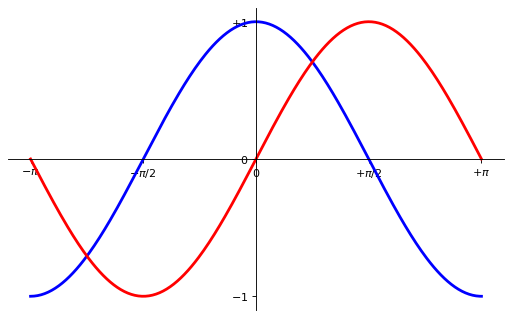

In [82]:
fig = plt.figure(figsize=(8,5), dpi=80)
ax = fig.add_subplot(111)

ax.spines['right'].set_visible(False) ##
ax.spines['top'].set_visible(False) ##
ax.xaxis.set_ticks_position('bottom') ##
ax.spines['bottom'].set_position(('data', 0)) ##
ax.yaxis.set_ticks_position('left') ##
ax.spines['left'].set_position(('data', 0)) ##

ax.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
ax.plot(X, S, color="red", linewidth=2.5, linestyle="-")

ax.set_xlim(X.min()*1.1, X.max()*1.1)
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

ax.set_ylim(C.min()*1.1,C.max()*1.1)
ax.set_yticks([-1, 0, +1])
ax.set_yticklabels([r'$-1$', r'$0$', r'$+1$'])


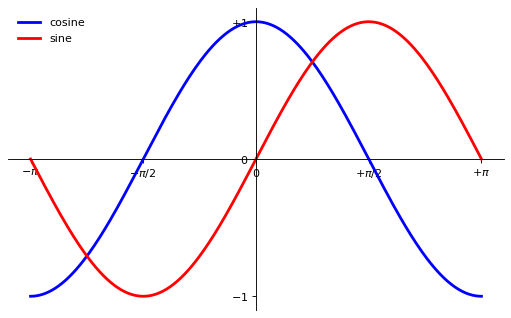

In [88]:
fig = plt.figure(figsize=(8,5), dpi=80)
ax = fig.add_subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
ax.plot(X, S, color="red", linewidth=2.5, linestyle="-", label="sine")

ax.set_xlim(X.min()*1.1, X.max()*1.1)
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

ax.set_ylim(C.min()*1.1,C.max()*1.1)
ax.set_yticks([-1, 0, +1])
ax.set_yticklabels([r'$-1$', r'$0$', r'$+1$'])

ax.legend(loc='upper left', frameon=False) ##


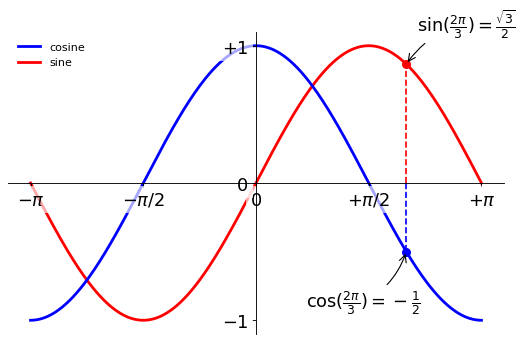

In [99]:
fig = plt.figure(figsize=(8,5), dpi=80)
ax = fig.add_subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine", zorder=-1)
ax.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine", zorder=-2)

ax.set_xlim(X.min()*1.1, X.max()*1.1)
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

ax.set_ylim(C.min()*1.1,C.max()*1.1)
ax.set_yticks([-1, 0, +1])
ax.set_yticklabels([r'$-1$', r'$0$', r'$+1$'])

ax.legend(loc='upper left', frameon=False)

t = 2*np.pi/3
ax.plot([t,t],[0,np.cos(t)], color ='blue',  linewidth=1.5, linestyle="--")
ax.plot([t,t],[0,np.sin(t)], color ='red',  linewidth=1.5, linestyle="--")

ax.scatter([t,],[np.cos(t),], 50, color ='blue')
ax.scatter([t,],[np.sin(t),], 50, color ='red')

ax.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$', xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
ax.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$', xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

for label in ax.get_xticklabels() + ax.get_yticklabels(): ##
    label.set_fontsize(16) ##
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 )) ##

In [93]:
ax.annotate?

In [626]:
#file=np.loadtxt('NGC5272.csv', delimiter='\t',unpack=True)
#len(file[1,:])

In [312]:
path= 'NGC5272.csv'
F_275 = np.loadtxt(path, usecols=1)
F_336 = np.loadtxt(path, usecols=2)
F_438 = np.loadtxt(path, usecols=3)
F_606 = np.loadtxt(path, usecols=4)
F_814 = np.loadtxt(path, usecols=5)
prob = np.loadtxt(path, unpack=True, usecols=6)

In [313]:
len(prob)

94989

In [314]:
## filtering out Prob lower than 90 %
F275=[]
F336=[]
F438=[]
F606=[]
F814=[]
for i in range(len(prob)):
    if prob[i]>90:
        F275.append(F_275[i])
        F336.append(F_336[i])
        F438.append(F_438[i])
        F606.append(F_606[i])
        F814.append(F_814[i])
len(F275)  
F275W=np.array(F275)
F336W=np.array(F336)
F438W=np.array(F438)
F606W=np.array(F606)
F814W=np.array(F814)

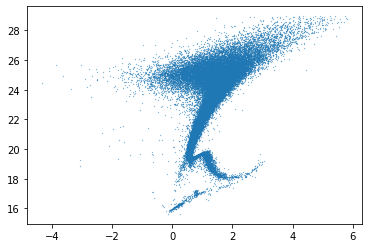

In [315]:
plt.scatter(F275W-F336W, F275W, s=0.05)

Text(0.5, 1.0, 'F606W vs F606W-F814W')

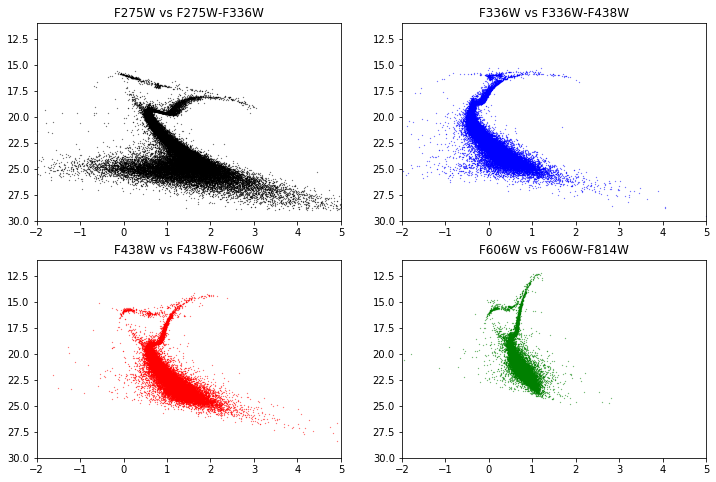

In [316]:
fig = plt.figure(figsize=(12,8)) # Try plt.figure? to know more about the parameters of creating a new figure.

ax1 = fig.add_subplot(2, 2, 1) # Equivalent to 1st element of 2x2 matrix
ax2 = fig.add_subplot(2, 2, 2) # Equivalent to 2nd element of 2x2 matrix
ax3 = fig.add_subplot(2, 2, 3) # Equivalent to 3rd element of 2x2 matrix
ax4 = fig.add_subplot(2, 2, 4) # Equivalent to 4th element of 2x2 matrix

ax1.scatter(F275W-F336W, F275W, s=0.05,color='k') 
ax1.set_ylim(30,11)
ax1.set_xlim(-2,5)
ax1.set_title('F275W vs F275W-F336W')
ax2.scatter(F336W-F438W, F336W, s=0.05,color='b')
ax2.set_ylim(30,11)
ax2.set_xlim(-2,5)
ax2.set_title('F336W vs F336W-F438W')
ax3.scatter(F438W-F606W, F438W, s=0.05,color='r') 
ax3.set_ylim(30,11)
ax3.set_xlim(-2,5)
ax3.set_title('F438W vs F438W-F606W')
ax4.scatter(F606W-F814W, F606W, s=0.05,color='g')
ax4.set_ylim(30,11)
ax4.set_xlim(-2,5)
ax4.set_title('F606W vs F606W-F814W')


In [317]:
F275W[3]

19.6482

In [318]:
###ANOTHER WAY USING FUNCTION

def HR_diagram(axis,mag1,mag2):
    colour=[]
    for i in range(len(mag1)):
        colour.append(float(mag1[i]-mag2[i]))
    axis.scatter(colour, mag1, s=0.05,color='k')  

In [205]:
HR_diagram(axis1,F275,F336)

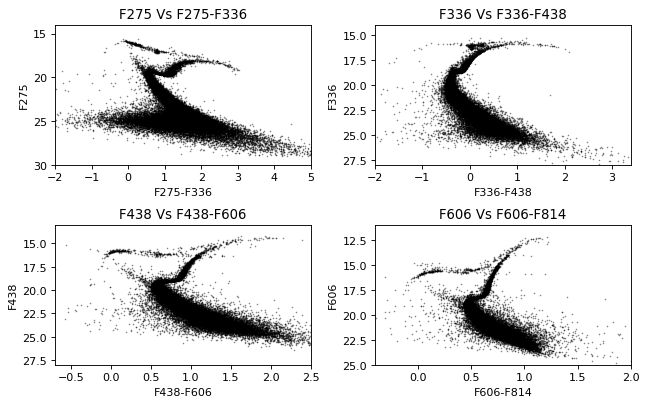

In [319]:
fig = plt.figure(figsize=(8,5), dpi=80)
axis1= fig.add_axes([0.1, 0.6, 0.4, 0.35],xlim=(-2,5),ylim=(30,14),xlabel='F275-F336',ylabel='F275',title='F275 Vs F275-F336')
axis2= fig.add_axes([0.6, 0.6, 0.4, 0.35],xlim=(-2,3.4),ylim=(28,14),xlabel='F336-F438',ylabel='F336',title='F336 Vs F336-F438')
axis3= fig.add_axes([0.1, 0.1, 0.4, 0.35],xlim=(-0.7,2.5),ylim=(28,13),xlabel='F438-F606',ylabel='F438',title='F438 Vs F438-F606')
axis4= fig.add_axes([0.6, 0.1, 0.4, 0.35],xlim=(-0.4,2),ylim=(25,11),xlabel='F606-F814',ylabel='F606',title='F606 Vs F606-F814')

HR_diagram(axis1,F275,F336)
HR_diagram(axis2,F336W,F438W)
HR_diagram(axis3,F438W,F606W)
HR_diagram(axis4,F606W,F814W)

In [5]:
import numpy as np
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt

In [6]:
plt.plot(x)

NameError: name 'x' is not defined

In [7]:
def hyst1(x,a):
    return a*(np.tanh(x-1))

In [8]:
def hyst2(x,a):
    return a*np.tanh(x+1)

In [9]:
def hyst3(x,a):
    return a*np.tanh(x)

In [26]:
#def line(x):
   # return 

In [10]:
xdata=np.arange(-6,6,0.01)
x0data=np.arange(0,12,0.01)
#x1data=np.arange(-6,6,0.01)
#xdata

In [11]:
y1data= hyst1(xdata,4) +0.2*np.random.randn(len(xdata))
y2data= hyst2(xdata,4)+ 0.2*np.random.randn(len(xdata))
y3data= hyst3(x0data,4)+ 0.2*np.random.randn(len(xdata))
y4data= 4
y5data= -4
#y1data[30]
#0.2*np.random.randn(len(xdata))[30]
len(xdata)

1200

In [12]:
p_opt1,p_cov1= cf(hyst1,xdata,y1data,4)
p_opt2,p_cov2= cf(hyst2,xdata,y2data,4)
p_opt3,p_cov3= cf(hyst3,x0data,y3data,4)

(-4, 4)

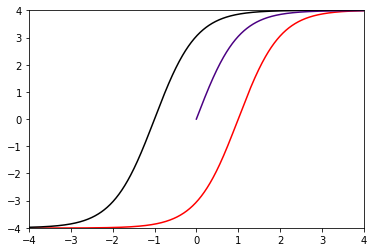

In [18]:
#plt.scatter(xdata, y1data, label = "Data",s=1)
plt.plot(xdata, hyst1(xdata, p_opt1), color = "red", label = "Hysteresis fit")
#plt.scatter(xdata, y2data, label = "Data",s=1)
plt.plot(xdata, hyst2(xdata, p_opt2), color = "black", label = "Hysteresis fit")
#plt.scatter(x0data, y3data, label = "Data",s=1)
plt.plot(x0data, hyst3(x0data, p_opt3), color = "indigo", label = "Hysteresis fit")
plt.xlim(-4,4)
plt.ylim(-4,4)

In [244]:
%matplotlib inline

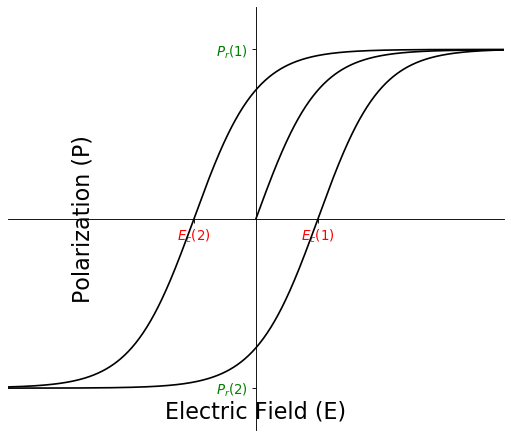

In [67]:
fig = plt.figure(figsize=(8,7), dpi=80)
ax = fig.add_subplot(111)

ax.spines['right'].set_visible(False) ##
ax.spines['top'].set_visible(False) ##
ax.xaxis.set_ticks_position('bottom') ##
ax.spines['bottom'].set_position(('data', 0)) ##
ax.yaxis.set_ticks_position('left') ##
ax.spines['left'].set_position(('data', 0)) ##
#ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([-1, 1])
ax.set_xticklabels(['$E_c(2)$','$E_c(1)$'])
ax.set_yticks([-4,4])
ax.set_yticklabels(['$P_r(2)$','$P_r(1)$'])

for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize('large')
    tick.set_color('red')
    tick.set_weight('bold')

for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize('large')
    tick.set_color('green')
    tick.set_weight('bold')    
    
#ax.scatter(xdata, y1data, label = "Data",s=1,color='r')
ax.plot(xdata, hyst1(xdata, p_opt1), color = "black")# label = "Hysteresis fit")
#ax.scatter(xdata, y2data, label = "Data",s=1,color='r')
ax.plot(xdata, hyst2(xdata, p_opt2), color = "black")# label = "Hysteresis fit")
#ax.scatter(x0data, y3data, label = "Data",s=1,color='r')
ax.plot(x0data, hyst3(x0data, p_opt3), color = "black") #label = "Hysteresis fit")
#ax.plot(xdata,4)
ax.set_xlim(-4,4)
ax.set_ylim(-5,5)
ax.set_xlabel('Electric Field (E)', fontsize=20)
ax.xaxis.labelpad = 140
ax.set_ylabel('Polarization (P)',fontsize=20)
ax.yaxis.labelpad = 110


In [16]:
import matplotlib.pyplot as plt
import numpy as np


In [17]:
def f(t):
    """Python function to calculate a enclosed sinusoid"""
    val = 1 / ((t-2.5)**2 + 1) * np.cos(4*np.pi*t)
    return val

t = np.arange(0.0, 5.0, 0.02)

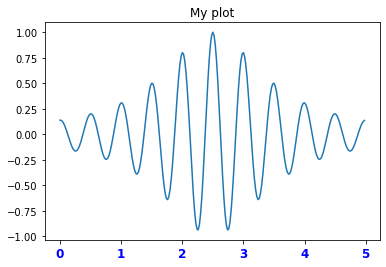

In [254]:
fig = plt.figure() # Initialize the figure and subplot
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, f(t))

# Set the font size via a keyword argument
ax.set_title("My plot", fontsize='large')

# Retrieve an element of a plot and set properties
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize('large')
    tick.set_color('blue')
    tick.set_weight('bold')

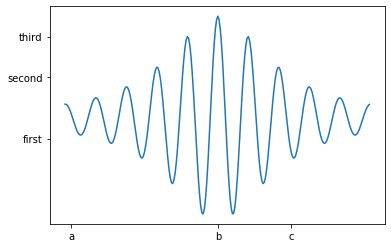

In [260]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([0.1, 2.5, 3.7])
ax.set_xticklabels(['a','b','c'])
ax.set_yticks([-0.2, 0.4, 0.8])
ax.set_yticklabels(['first','second','third'])
ax.plot(t, f(t))

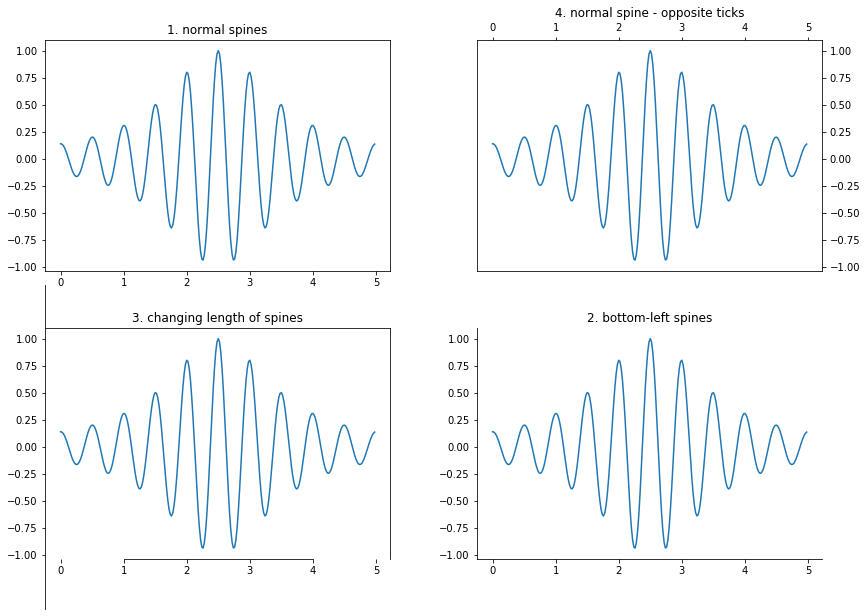

In [263]:
# Constrained layout makes sure the labels don't overlap the axes.
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_axes([0.1, 0.6, 0.4, 0.4])
ax1.plot(t, f(t))
ax1.set_title('1. normal spines')

ax2 = fig.add_axes([0.6, 0.1, 0.4, 0.4])
ax2.plot(t, f(t))
ax2.set_title('2. bottom-left spines')

ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.4])
ax3.plot(t, f(t))
ax3.set_title('3. changing length of spines')

ax4 = fig.add_axes([0.6, 0.6, 0.4, 0.4])
ax4.plot(t, f(t))
ax4.set_title('4. normal spine - opposite ticks')

# Hide the right and top spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Only draw spine between the certain ticks
ax3.spines['left'].set_bounds(-1.5, 1.5)
ax3.spines['bottom'].set_bounds(1 ,4)

# Switching tick position
ax4.yaxis.set_ticks_position('right')
ax4.xaxis.set_ticks_position('top')

In [592]:
ax.secondary_xaxis?
plt.style.use?

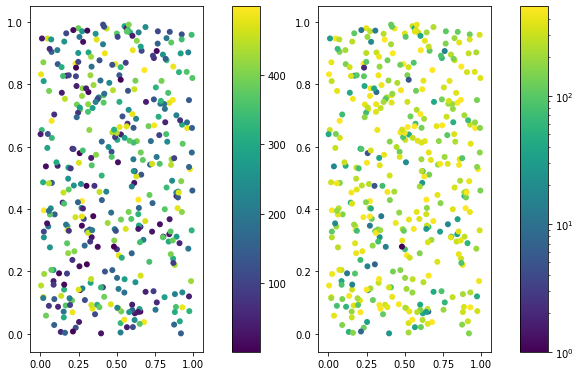

In [271]:
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_axes([0.1, 0.1, 0.3, 0.8])
ax2 = fig.add_axes([0.6, 0.1, 0.3, 0.8])
x = np.random.random(400)
y = np.random.random(400)
c = np.random.randint(low=1, high=500, size=400)

s1 = ax1.scatter(x, y, c=c, edgecolor='none') # c is for color
s2 = ax2.scatter(x, y, c=c, edgecolor='none', norm=matplotlib.colors.LogNorm()) # colorbar is logarithmic

colorbar_ax1 = fig.add_axes([0.45, 0.1, 0.05, 0.8])
colorbar_ax2 = fig.add_axes([0.95, 0.1, 0.05, 0.8])

fig.colorbar(s1, cax=colorbar_ax1) # cax means colorbar axes
fig.colorbar(s2, cax=colorbar_ax2)

In [599]:
plt.style.available?

Text(0.5, 0, 'angle [rad]')

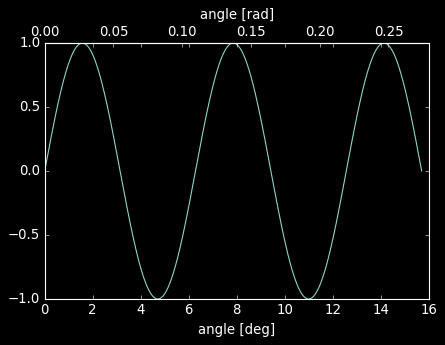

In [607]:
fig = plt.figure(figsize=(6,4))
#plt.style.use([])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

x = np.linspace(0, 5*np.pi, 500)

ax.plot(x, np.sin(x))
#ax.set_facecolor("white")


ax.set_xlabel('angle [deg]')

def deg2rad(x):
    return x * np.pi / 180

def rad2deg(x):
    return x * 180 / np.pi

secax = ax.secondary_xaxis(location='top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]') # Set the label this way as set_xlabel is for the primary axis.

In [273]:
import matplotlib.patches as patches

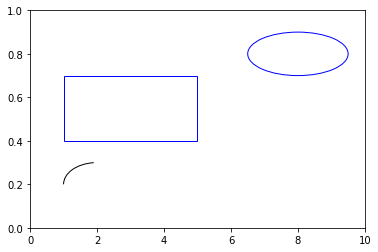

In [305]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_xlim([0,10])
el1 = patches.Rectangle(xy=(5,0.4), width=0.3, height=4, angle=90,fill=False, color='blue')
el2 = patches.Ellipse(xy=(8,0.8), width=3, height=0.2, fill=False, color='blue')
el3 = patches.Arc(xy=(2,0.2), width=0.2, height=2, angle=90, theta1=45, theta2=90,facecolor='yellow' ,edgecolor='black')#facecolor='yellow', edgecolor='black')

ax.add_patch(el1)
ax.add_patch(el2)
ax.add_patch(el3)

Text(3.4, 18, 'RED-GIANT BRANCH')

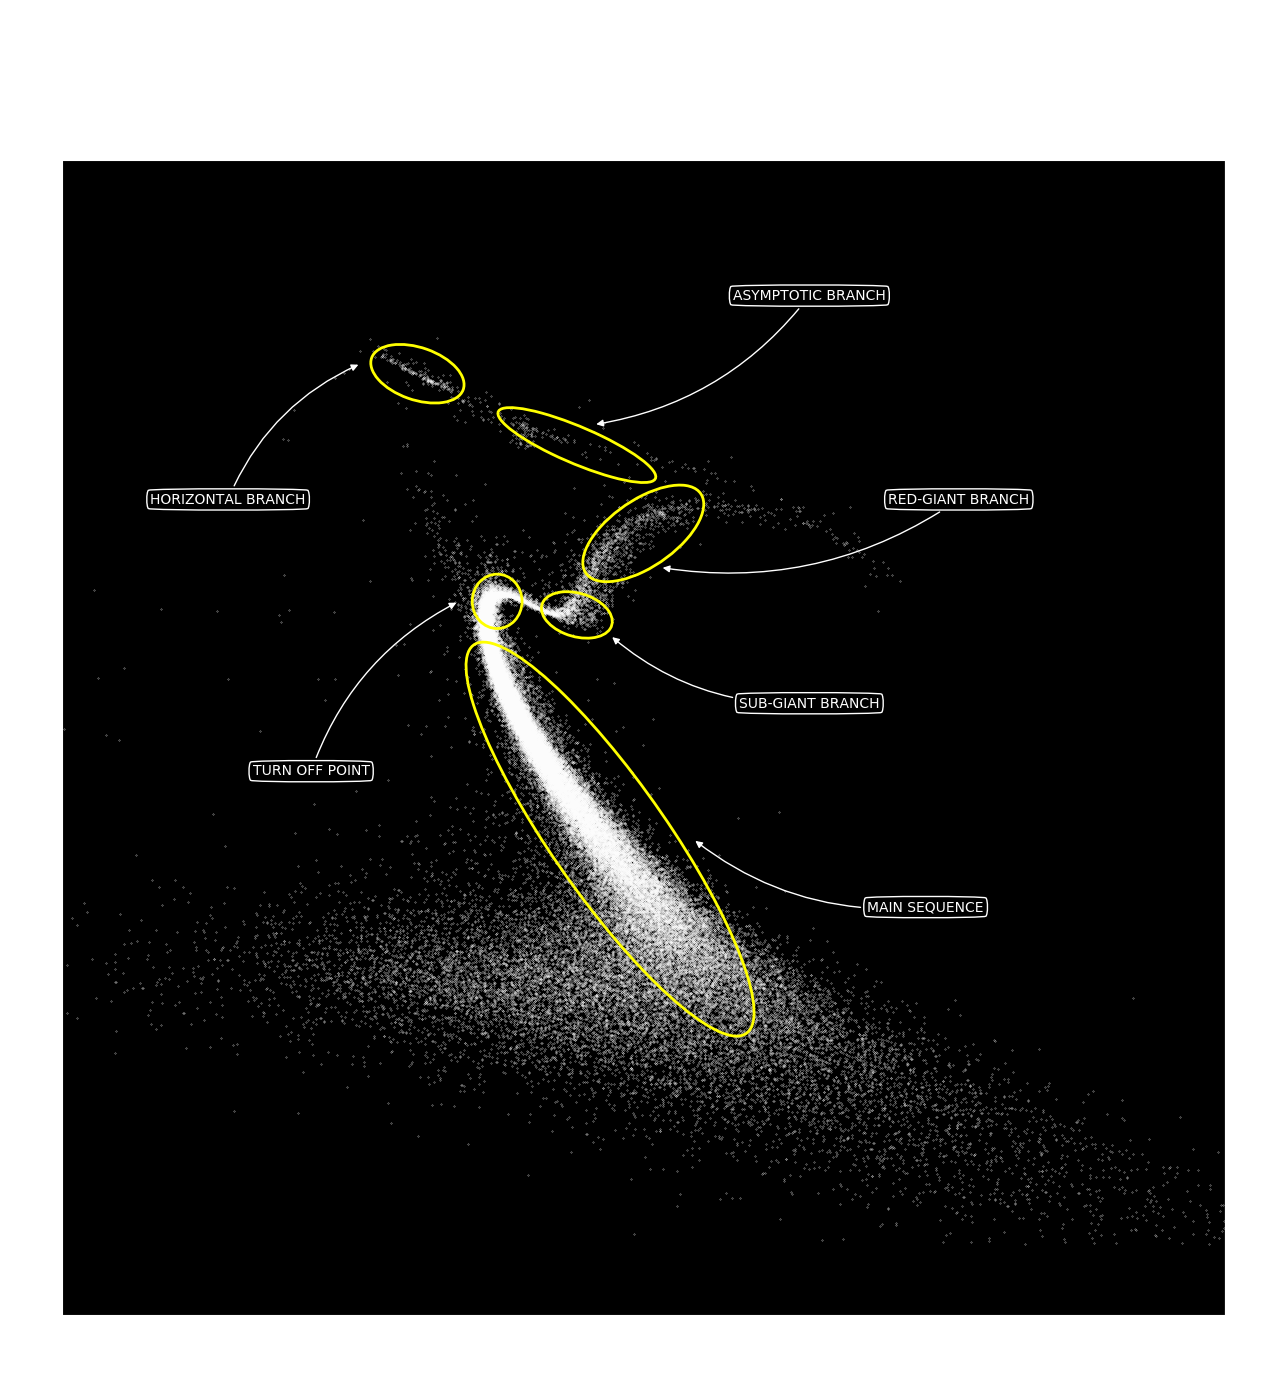

In [896]:
fig=plt.figure(figsize=(15,15))#,facecolor='k')
plt.style.use(['dark_background'])

#FIGURE TITLE

fig.suptitle('HR Diagram', fontsize=22)

#Plot 
ax=fig.add_subplot(1, 1, 1) 
ax.scatter(F275W-F336W, F275W, s=0.05,color='w') 
ax.set_ylim(30,13) 
ax.set_xlabel('color 275nm-336nm',fontsize=14) 
ax.set_ylabel('Apparant magnitude in 275 nm', fontsize=14) 
ax.set_xlim(-2,5)

#AXIS Title 
ax.set_title('Messier 3',fontsize=14)

#Secondary axis for luminosity
secax = ax.secondary_yaxis(location='right')
secax.set_yticks([16.14,18.64,21.14,23.64,26.14,28.64])
secax.set_yticklabels([' 1000 ',' 100 ',' 10 ',' 1 ',' 0.1 ',' 0.01 '])
secax.set_ylabel('Luminosity in Solar units', fontsize=14) 

#Drawing ellipses and finding regions 
ms = patches.Ellipse(xy=(1.3,23), width=0.8, height=6, fill=False,angle=165, color='yellow',linewidth=2) 
hs = patches.Ellipse(xy=(0.14,16.15), width=0.5, height=0.9, fill=False,angle=340, color='yellow',linewidth=2) 
to = patches.Ellipse(xy=(0.62,19.5), width=0.3, height=0.8, fill=False,angle=0, color='yellow',linewidth=2) 
asy = patches.Ellipse(xy=(1.1,17.2), width=0.4, height=1.4, fill=False,angle=320, color='yellow',linewidth=2)
sg = patches.Ellipse(xy=(1.1,19.7), width=0.4, height=0.7, fill=False,angle=165, color='yellow',linewidth=2)
rg = patches.Ellipse(xy=(1.5,18.5), width=0.55, height=1.5, fill=False,angle=20, color='yellow',linewidth=2)
ax.add_patch(ms) 
ax.add_patch(hs) 
ax.add_patch(to) 
ax.add_patch(asy)
ax.add_patch(sg)
ax.add_patch(rg)

#ANNOTATION
ax.annotate(s='MAIN SEQUENCE', xy=(1.8,23), xycoords='data', xytext=(3.2,24), textcoords='data', size=10,
             va='center', ha='center', bbox=dict(boxstyle='round4', fc='k'),
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2', fc='w'))
ax.annotate(s='TURN OFF POINT', xy=(0.39,19.5), xycoords='data', xytext=(-0.5,22), textcoords='data', size=10,
             va='center', ha='center', bbox=dict(boxstyle='round4', fc='k'),
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2', fc='w'))
ax.annotate(s='SUB-GIANT BRANCH', xy=(1.3,20), xycoords='data', xytext=(2.5,21), textcoords='data', size=10,
             va='center', ha='center', bbox=dict(boxstyle='round4', fc='k'),
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2', fc='w'))
ax.annotate(s='ASYMPTOTIC BRANCH', xy=(1.2,16.9), xycoords='data', xytext=(2.5,15), textcoords='data', size=10,
             va='center', ha='center', bbox=dict(boxstyle='round4', fc='k'),
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2', fc='w'))
ax.annotate(s='HORIZONTAL BRANCH', xy=(-0.2,16), xycoords='data', xytext=(-1,18), textcoords='data', size=10,
             va='center', ha='center', bbox=dict(boxstyle='round4', fc='k'),
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2', fc='w'))
ax.annotate(s='RED-GIANT BRANCH', xy=(1.6,19), xycoords='data', xytext=(3.4,18), textcoords='data', size=10,
             va='center', ha='center', bbox=dict(boxstyle='round4', fc='k'),
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2', fc='w'))

In [611]:
#### DISTANCE TO CLUSTER
5*(np.log10(10.4*3.0856e19)-1)

97.53186482578383

In [584]:
print('END OF ASSIGNMENT 09')
print('*'*120)
print('*'*120)
print('*'*120)
print('*'*120)

END OF ASSIGNMENT 09
************************************************************************************************************************
************************************************************************************************************************
************************************************************************************************************************
************************************************************************************************************************


In [627]:
import numpy as np
from astropy import units as u 

In [628]:
q = 42.0 * u.m 
lengths = [1,2,3]*u.m

In [629]:
print(q.value,q.unit) #Ofcourse, we can use q.value with any other command also

print(lengths.value,q.unit)
print(lengths[0].value , lengths[0].unit)

42.0 m
[1. 2. 3.] m
1.0 m


In [641]:
distance2 =45 * u.m
distance1 =5*u.m
time = 2 * u.s
speed=(distance2-distance1)/time
print(speed)
print(speed.to(u.km/u.hr))
#print(speed)
print(1*(u.joule).cgs)


20.0 m / s
72.0 km / h
1.0 1e+07 erg


In [645]:
mph=u.imperial.mile/u.hr
print(speed.to(mph))

44.73872584108805 mi / h


In [669]:
r = 1*u.AU
d = 1*u.parsec
print(d/r)
print(float(d/r)) #Notice how the float method is used to convert dimensionless scaled quatities to numbers
                  #The float method will not work with quantities having some dimension

AvgDensity_of_sun = 1*u.Msun/(4*np.pi/3*(1*u.Rsun)**3)
print(AvgDensity_of_sun.to(u.kg/u.m**3)) #Side note: note how this quite close to density of water
print(1*u.Msun.to(u.kg))
print(u.Rsun.to(u.m))
qty=3*u.Msun/(4*((u.Rsun)**3))
print(qty.to(u.kg/(u.m)**3))

1.0 pc / AU
206264.8062454803
1409.7798243075256 kg / m3
1.988409870698051e+30
695700000.0
4428.953939223631 kg / m3


In [679]:
#u.spectral?
print((1000*u.nm).to(u.Hz, equivalencies=u.spectral()))

299792457999999.94 Hz


In [680]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const

In [686]:
print(const.k_B)

  Name   = Boltzmann constant
  Value  = 1.380649e-23
  Uncertainty  = 0.0
  Unit  = J / K
  Reference = CODATA 2018


In [695]:
c = const.c
kB = const.k_B
h = const.h
print(h)

  Name   = Planck constant
  Value  = 6.62607015e-34
  Uncertainty  = 0.0
  Unit  = J s
  Reference = CODATA 2018


In [696]:
def B(wl,T): #lambda is a reserved keyword in python, so wavelength is assigned variable wl
    exponential = 1/(np.exp(h*c/(wl*kB*T))-1)
    prefactor = 2*np.pi*h*c*c/wl**5
    return prefactor*exponential

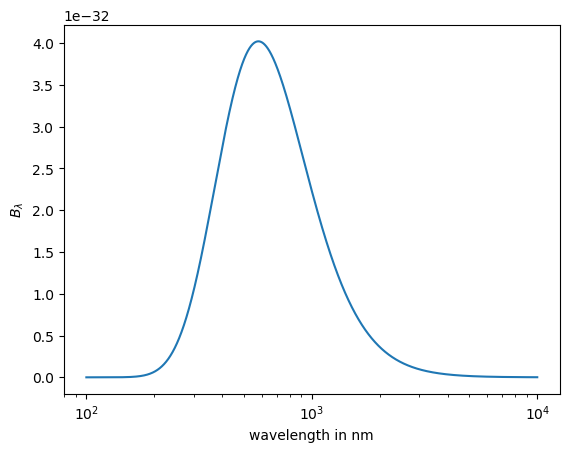

In [702]:
plt.style.use('default')
wl0 = np.linspace(100,10000,100000)*u.nm
T0 = 5000 *u.K
plt.xscale('log')
plt.xlabel('wavelength in nm')
plt.ylabel('$B_\lambda$')
plt.plot(wl0.value,B(wl0,T0).value)
plt.show()

In [751]:
from astropy.io import fits


In [752]:
SDSS_filter = fits.open('filter_curves.fits')
SDSS_filter.info()

Filename: filter_curves.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      63   ()      
  1  U             1 BinTableHDU     20   47R x 5C   [E, E, E, E, E]   
  2  G             1 BinTableHDU     20   89R x 5C   [E, E, E, E, E]   
  3  R             1 BinTableHDU     20   75R x 5C   [E, E, E, E, E]   
  4  I             1 BinTableHDU     20   89R x 5C   [E, E, E, E, E]   
  5  Z             1 BinTableHDU     20   141R x 5C   [E, E, E, E, E]   


In [757]:
SDSS_filter[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   20 / length of dimension 1                          
NAXIS2  =                   47 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
TTYPE1  = 'wavelength'                                                          
TFORM1  = 'E       '                                                            
TUNIT1  = 'angstrom'                                                            
TTYPE2  = 'respt   '                                                            
TFORM2  = 'E       '        

In [761]:
U = SDSS_filter[1].data
G = SDSS_filter[2].data
R = SDSS_filter[3].data
I = SDSS_filter[4].data
Z = SDSS_filter[5].data

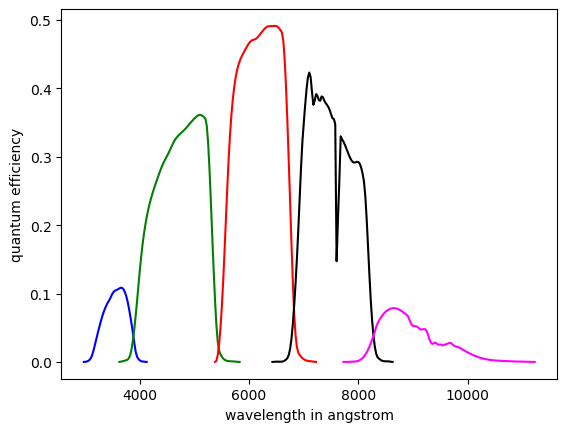

In [759]:
plt.plot(U['wavelength'],U['respt'],color='blue') 
plt.plot(G['wavelength'],G['respt'],color='green')
plt.plot(R['wavelength'],R['respt'],color='red')
plt.plot(I['wavelength'],I['respt'],color='black')
plt.plot(Z['wavelength'],Z['respt'],color='magenta')
plt.ylabel('quantum efficiency')
plt.xlabel('wavelength in angstrom')
plt.show()

In [787]:
wavelengths = G['wavelength']*u.AA #Angstroms
qG = G['respt'] 
Tsirius = 9940 * u.K
r_sirius = 1.711*u.Rsun
d_sirius = 2.64 * u.pc

In [790]:
integral = 0*u.W/u.m**2
i = 1
while i < len(wavelengths):
    integral += B((wavelengths[i-1]+wavelengths[i])/2 , Tsirius)*(qG[i-1]+qG[i])/2*(wavelengths[i]-wavelengths[i-1])
    i = i + 1
intensity = integral*(r_sirius/d_sirius)**2
print(intensity.to(u.W/u.m**2))

7.024221696059715e-09 W / m2


In [826]:
wavelengths_G = G['wavelength']*u.AA #Angstroms
qG = G['respt']
wavelengths_R = R['wavelength']*u.AA #Angstroms
qR = R['respt']
#wavelengthsR
len(wavelengths_G),len(wavelengths_R)

(89, 75)

In [863]:
intensity_G = 1.3887e-09 * (u.W / u.m**2)
intensity_R = 2.5553e-09 * (u.W / u.m**2)
ratio=intensity_G/intensity_R
print(ratio)

0.5434586936954565


In [843]:
def G_R_ratio(T):
        integral_G = 0*u.W/u.m**2
        i = 1
        while i < len(wavelengths_G):
            integral_G += B((wavelengths_G[i-1]+wavelengths_G[i])/2 , T)*(qG[i-1]+qG[i])/2*(wavelengths_G[i]-wavelengths_G[i-1])
            i = i + 1
        integral_R = 0*u.W/u.m**2
        j = 1
        while j < len(wavelengths_R):
            integral_R += B((wavelengths_R[j-1]+wavelengths_R[j])/2 , T)*(qR[j-1]+qR[j])/2*(wavelengths_R[j]-wavelengths_R[j-1])
            j = j + 1    
        return(integral_G/integral_R)    

In [860]:
G_R_ratio(4300*u.K)

<Quantity 0.54631933>

In [887]:
T=np.arange(1000,10000,50)*u.K
GR=[]
for k in T:
    GR.append(G_R_ratio(k))
#GR[66]

In [890]:
index=0
while(GR[index]-ratio<0.01):
    index+=1
#print(index) 
#TEMPERATURE of the star
print('Temparature of the star Arcturus is appx {}'.format(T[index]))

Temparature of the star Arcturus is appx 4350.0 K


In [891]:
print('END OF ASSIGNMENT 10')
print('*'*120)
print('*'*120)
print('*'*120)
print('*'*120)

END OF ASSIGNMENT 10
************************************************************************************************************************
************************************************************************************************************************
************************************************************************************************************************
************************************************************************************************************************


In [5]:
from astropy import units as u

In [31]:
class star:                         # Use keyword "class" for class definition
    Temperature = 3590*u.K              # Attributes of the class
    Radius = 887*u.Rsun
    distance = 700*u.lightyear
    
    def print_star(self):           # Method of the class
        print(f'Temperature={self.Temperature}\n Radius={self.Radius}\n Distance={self.distance}')

In [32]:
Betelgeuse = star()           # Betelgeuse is now an "object" of this class
Betelgeuse.print_star()

Temperature=3590.0 K
 Radius=887.0 solRad
 Distance=700.0 lyr


In [8]:
Rigel = star()
Rigel.Radius = 78.9*u.Rsun
Rigel.Temperature = 11000*u.K
Rigel.distance = 864.3*u.lightyear
Rigel.print_star()
Betelgeuse.print_star()

Temperature=11000.0 K
 Radius=78.9 solRad
 Distance=864.3 lyr
Temperature=3590.0 K
 Radius=887.0 solRad
 Distance=700.0 lyr


In [9]:
class star:
    def __init__(self, temp,rad,dist):       
        self.Temperature = temp*u.K
        self.Radius = rad*u.Rsun
        self.distance = dist*u.lightyear
    
    def print_star(self):
        print(f'Temperature={self.Temperature}\n Radius={self.Radius}\n Distance={self.distance}')

In [10]:
Bellatrix = star(22000,5.7525,250)
Bellatrix.print_star()

Temperature=22000.0 K
 Radius=5.7525 solRad
 Distance=250.0 lyr


In [11]:
#Betelgeuse = star()
#Betelgeuse.print_star()

In [12]:
#Betelgeuse.__init__(3590,887,700)

In [13]:
class star:
    Temperature=3590*u.K              # Class attribute
    
    def __init__(self,rad,dist):
        self.Radius = rad*u.Rsun        # Instance attribute
        self.distance = dist*u.lightyear
    
    def print_star(self):           # Method of the class
        print(f'Temperature={self.Temperature}  \n Radius={self.Radius} \n Distance={self.distance}')

print(star.Temperature)
# Class attribute being accessed by the class name. Note that no object has been made for this class.

3590.0 K


In [14]:
Sun=star(1,1)
Sun.print_star()

Temperature=3590.0 K  
 Radius=1.0 solRad 
 Distance=1.0 lyr


In [15]:
class star:  
    def __init__(self, temp,rad,dist):
        self.Temperature = temp*u.K
        self.Radius = rad*u.Rsun
        self.distance = dist*u.lightyear
    
    def print_star(self):
        print(f'Temperature={self.Temperature}  \n Radius={self.Radius}  \n Distance={self.distance}')
    
    def set_temp(self,temp):
        self.Temperature = temp*u.K

In [16]:
Betelgeuse = star(0,887,700)
Betelgeuse.print_star()
Betelgeuse.set_temp(3590)
Betelgeuse.print_star()

Temperature=0.0 K  
 Radius=887.0 solRad  
 Distance=700.0 lyr
Temperature=3590.0 K  
 Radius=887.0 solRad  
 Distance=700.0 lyr


In [17]:
class star:
    def __init__(self, temp,rad,dist):
        self.Temperature = temp*u.K
        self.Radius = rad*u.Rsun
        self.distance = dist*u.lightyear
    
    def print_star(self):
        print(f'Temperature={self.Temperature} \n Radius={self.Radius}  \n Distance={self.distance}')
    
    def set_temp(self,temp):
        self.Temperature = temp*u.K
    
    def add_uncertainty(self,uncertainty):
        return (self.Radius + uncertainty*u.Rsun)

In [23]:
Betelgeuse = star(3590,887,700)
Betelgeuse.set_temp(900)
print(Betelgeuse.add_uncertainty(100))
Betelgeuse.print_star()

987.0 solRad
Temperature=900.0 K 
 Radius=887.0 solRad  
 Distance=700.0 lyr


In [24]:
class star:    
    def __init__(self, temp,rad,dist):
        self.Temperature = temp*u.K
        self.Radius = rad*u.Rsun
        self.distance = dist*u.lightyear
    
    def print_star(self):
        print(f'Temperature={self.Temperature} \n Radius={self.Radius} \n Distance={self.distance}')
    
    def set_temp(self,temp):
        self.Temperature = temp*u.K
    
    def add_uncertainty(self,uncertainty):
        return (self.Radius_solar + uncertainty*u.Rsun)

class redgiant(star):               # Notice the argument
    def isredgiant(self):
        return True

In [25]:
Aldebaran=redgiant(3910,44,65.23) 
# This command calls the __init__() function of the parent class,i.e. star class,
# Aldebaran is now an object of the redgiant class

print(Aldebaran.isredgiant())
Aldebaran.print_star()     

True
Temperature=3910.0 K 
 Radius=44.0 solRad 
 Distance=65.23 lyr


In [26]:
Aldebaran = redgiant()


TypeError: __init__() missing 3 required positional arguments: 'temp', 'rad', and 'dist'

In [33]:
class star(object):    
    def __init__(self, temp,rad,dist):
        self.Temperature_K = temp
        self.Radius_solar = rad
        self.distance_light_years = dist
    
    def print_star(self):
        print(f'Temperature={self.Temperature_K} K \n Radius={self.Radius_solar} solar radii \n Distance={self.distance_light_years} ly')
    
    def add_uncertainty(self,uncertainty):
        return (self.Radius_solar+uncertainty)

class redgiant(star):
    def __init__(self,temp,rad,dist,age):
        self.age = age*u.yr
        star.__init__(self,temp,rad,dist)    # Invoking the __init() function of the star class explicitly
    
    def isredgiant(self):
        return True
    
    def print_age(self):
        print(self.age)

In [28]:
Aldebaran = redgiant(3910,44,65.23,6.605*10**9)
print(Aldebaran.isredgiant())
Aldebaran.print_age()
Aldebaran.print_star()

True
6605000000.0 yr
Temperature=3910 K 
 Radius=44 solar radii 
 Distance=65.23 ly


In [34]:
def change_temp1(obj):
    print(2*obj.Temperature)

def change_temp2(obj):
    Rigel=star(11000,78.9,864.3)
    obj=Rigel                                  # Rigel gets stored in an object copied from obj
    print(obj.Temperature)

def change_temp3(obj):
    obj.Temperature=obj.Temperature*2
    print(obj.Temperature)

class star(object):    
    def __init__(self, temp,rad,dist):
        self.Temperature = temp*u.K
        self.Radius = rad*u.Rsun
        self.distance = dist*u.lightyear
    
    def print_star(self):
        print(f'Temperature={self.Temperature}  \n Radius={self.Radius} \n Distance={self.distance}')
    
    def add_uncertainty(self,uncertainty):
        return (self.Radius_solar+uncertainty*u.Rsun)

In [37]:
Betelgeuse=star(3590,887,700)
change_temp3(Betelgeuse)
Betelgeuse.print_star()

7180.0 K
Temperature=7180.0 K  
 Radius=887.0 solRad 
 Distance=700.0 lyr


In [133]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u 
from astropy.io import fits

In [135]:
c = const.c
kB = const.k_B
h = const.h

In [158]:
class star(object):
    def __init__(self, temp,rad,dist):       
        self.Temperature = temp*u.K
        self.Radius = rad*u.Rsun
        self.distance = dist.to(u.lightyear)
    
    def print_star(self):
        print(f'Temperature={self.Temperature}\n Radius={self.Radius}\n Distance={self.distance}')    

In [159]:
def B(wl,T): #lambda is a reserved keyword in python, so wavelength is assigned variable wl
    exponential = 1/(np.exp(h*c/(wl*kB*T))-1)
    prefactor = 2*np.pi*h*c*c/wl**5
    return prefactor*exponential

In [160]:
class filt_:
    def __init__(self,filter):
        self.qef=filter.data['respt']
        self.wvl=filter.data['wavelength']*u.AA
    def calc_intensity(self,star):
        integral = 0*u.W/u.m**2
        i = 1
        while i < len(self.wvl):
            integral += B((self.wvl[i-1]+self.wvl[i])/2 , star.Temperature)*(self.qef[i-1]+self.qef[i])/2*(self.wvl[i]-self.wvl[i-1])
            i = i + 1
        intensity = integral*(star.Radius/star.distance)**2
        return intensity.to(u.W/u.m**2)
#print(intensity.to(u.W/u.m**2))

In [161]:
SDSS_filter = fits.open('filter_curves.fits')
SDSS_filter.info()

Filename: filter_curves.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      63   ()      
  1  U             1 BinTableHDU     20   47R x 5C   [E, E, E, E, E]   
  2  G             1 BinTableHDU     20   89R x 5C   [E, E, E, E, E]   
  3  R             1 BinTableHDU     20   75R x 5C   [E, E, E, E, E]   
  4  I             1 BinTableHDU     20   89R x 5C   [E, E, E, E, E]   
  5  Z             1 BinTableHDU     20   141R x 5C   [E, E, E, E, E]   


In [170]:
U = SDSS_filter[1]
G = SDSS_filter[2]
R = SDSS_filter[3]
I = SDSS_filter[4]
Z = SDSS_filter[5]
U=filt_(U)
g=filt_(G)
R=filt_(R)
I=filt_(I)
Z=filt_(Z)

In [163]:
Sirius=star(9940,1.711,2.64 * u.pc) 
Sirius.print_star()

Temperature=9940.0 K
 Radius=1.711 solRad
 Distance=8.610528371654564 lyr


In [172]:
g.calc_intensity(Sirius)
#.calc_intensity(Sirius)

<Quantity 7.0242217e-09 W / m2>

In [174]:
print('END OF ASSIGNMENT 11')
print('*'*120)
print('*'*120)
print('*'*120)
print('*'*120)

END OF ASSIGNMENT 11
************************************************************************************************************************
************************************************************************************************************************
************************************************************************************************************************
************************************************************************************************************************
